# Introduction

We decided to build our project around the problem that hotels may face, specially around the holidays. This problems is based on the behavior of hotel customers. We are going to group the accordingly, so we can advise the hotel owner on which groups of customers are worth pursuing in order to hotels to remain profitable. This way, they'll have better insights on how to market and run promotions.
This is very important in today’s era, with the rise of Airbnb and other housing platforms, because hotels are no longer one of the only lodging options. This dataset is about a hotel in Lisbon, and it's a good way to understand and get good insights on past customer’s behavior in order to predict and target potential future ones. It comprehends three yearsof customer behavior, geographic and demographic information.

# Hotel Booking Cancelation Prediction

In [1]:
!pip install xlrd
!pip install openpyxl
!pip install scikit-plot
!pip install mlxtend  

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import numpy as np

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt

In [4]:
df = pd.read_excel(r'C:\Users\bruna\Desktop\IA_PROJETO02_G11\HotelCustomersDataset.xlsx')

In [5]:
df.shape

(83590, 32)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.5,62692.750,83590.00
Age,79811.0,45.398028,16.572368,-11.0,34.00,46.0,57.000,122.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.0,723.000,1095.00
AverageLeadTime,83590.0,66.196028,87.758990,-1.0,0.00,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.0,6.000,116.00


In [7]:
# Replacing impossible values of some variables
# Age
df.loc[df['Age'] < 0, 'Age'] = np.nan
df.loc[df['Age'] > 100, 'Age'] = np.nan
# AverageLeadTime
df.loc[df['AverageLeadTime'] < 0, 'AverageLeadTime'] = np.nan
# DaysSinceLastStay
df.loc[df['DaysSinceLastStay'] < 0, 'DaysSinceLastStay'] = np.nan
# DaysSinceFirstStay
df.loc[df['DaysSinceFirstStay'] < 0, 'DaysSinceFirstStay'] = np.nan

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.5,62692.750,83590.00
Age,79786.0,45.402401,16.543028,0.0,34.00,46.0,57.000,96.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.0,723.000,1095.00
AverageLeadTime,83580.0,66.204068,87.761161,0.0,0.00,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.0,6.000,116.00


In [9]:
# Imputing the Age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [10]:
# Imputing AverageLeadTime
mean_AverageLeadTime = df['AverageLeadTime'].mean()
df['AverageLeadTime'] = df['AverageLeadTime'].fillna(mean_AverageLeadTime)

In [11]:
# Imputing DaysSinceLastStay
mean_DaysSinceLastStay = df['DaysSinceLastStay'].mean()
df['DaysSinceLastStay'] = df['DaysSinceLastStay'].fillna(mean_DaysSinceLastStay)

In [12]:
# Imputing DaysSinceFirstStay
mean_DaysSinceFirstStay = df['DaysSinceFirstStay'].mean()
df['DaysSinceFirstStay'] = df['DaysSinceFirstStay'].fillna(mean_DaysSinceFirstStay)
#df.isnull()

In [13]:
# dropping columns
del df['NameHash']
del df['DocIDHash']

The next cells can be used to check and replace which columns have null values, so they can be managed. But, since we already take care of that some cells ahead, they are commented.

In [14]:
print(df.shape)
#df.isnull().sum()

(83590, 30)


In [14]:
#df['Age'].value_counts().index[0]

In [15]:
#df['Age'].fillna(df['Age'].value_counts().index[0],inplace=True)

In [16]:
#df.fillna(0,inplace=True)

In [17]:
#df.isnull().sum()

In [15]:
sh = df.shape
print("There are {} rows and {} columns.".format(sh[0], sh[1]))

There are 83590 rows and 30 columns.


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.500000,62692.750,83590.00
Age,83590.0,45.402401,16.162222,0.0,34.00,45.402401,56.000,96.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.000000,723.000,1095.00
AverageLeadTime,83590.0,66.204068,87.755912,0.0,0.00,29.000000,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.000000,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.500000,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.000000,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.000000,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.000000,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.000000,6.000,116.00


In [17]:
# Computing the number of unique values of Nationalities 
df['Nationality'].nunique()

188

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   83590 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   AverageLeadTime       83590 non-null  float64
 5   LodgingRevenue        83590 non-null  float64
 6   OtherRevenue          83590 non-null  float64
 7   BookingsCanceled      83590 non-null  int64  
 8   BookingsNoShowed      83590 non-null  int64  
 9   BookingsCheckedIn     83590 non-null  int64  
 10  PersonsNights         83590 non-null  int64  
 11  RoomNights            83590 non-null  int64  
 12  DaysSinceLastStay     83590 non-null  float64
 13  DaysSinceFirstStay    83590 non-null  float64
 14  DistributionChannel   83590 non-null  object 
 15  MarketSegment      

In [19]:
# Replacing three variables object to category 
df['Nationality'] = df['Nationality'].astype('category')
df['DistributionChannel'] = df['DistributionChannel'].astype('category')
df['MarketSegment'] = df['MarketSegment'].astype('category')

In [20]:
# Checking our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    83590 non-null  int64   
 1   Nationality           83590 non-null  category
 2   Age                   83590 non-null  float64 
 3   DaysSinceCreation     83590 non-null  int64   
 4   AverageLeadTime       83590 non-null  float64 
 5   LodgingRevenue        83590 non-null  float64 
 6   OtherRevenue          83590 non-null  float64 
 7   BookingsCanceled      83590 non-null  int64   
 8   BookingsNoShowed      83590 non-null  int64   
 9   BookingsCheckedIn     83590 non-null  int64   
 10  PersonsNights         83590 non-null  int64   
 11  RoomNights            83590 non-null  int64   
 12  DaysSinceLastStay     83590 non-null  float64 
 13  DaysSinceFirstStay    83590 non-null  float64 
 14  DistributionChannel   83590 non-null  category
 15  Ma

# EDA - exploratory data analysis
It's used to understand the signals and nuances of our dataset. It's a cyclical process that can be done at various points of our development process (before/after labeling, preprocessing, etc, depending on how well the problem is defined)

<AxesSubplot:title={'center':'Correlation Between Features'}>

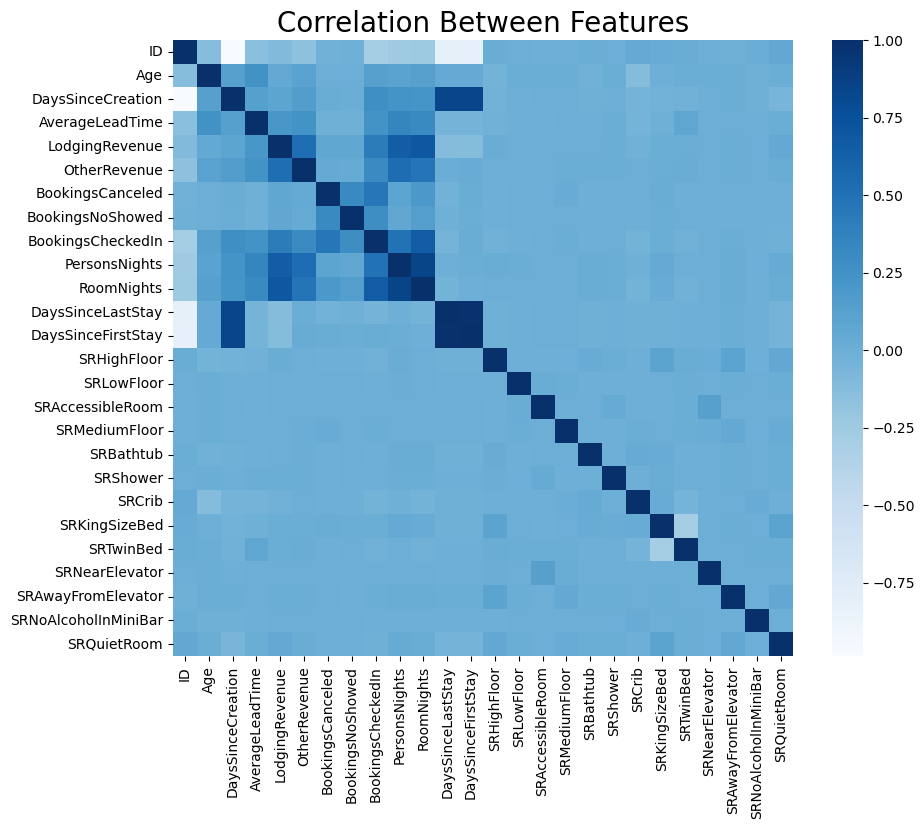

In [21]:
# Correlation with all variables 
df_corr = df.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation Between Features', fontsize=20)
sns.heatmap(df_corr,cmap="Blues")

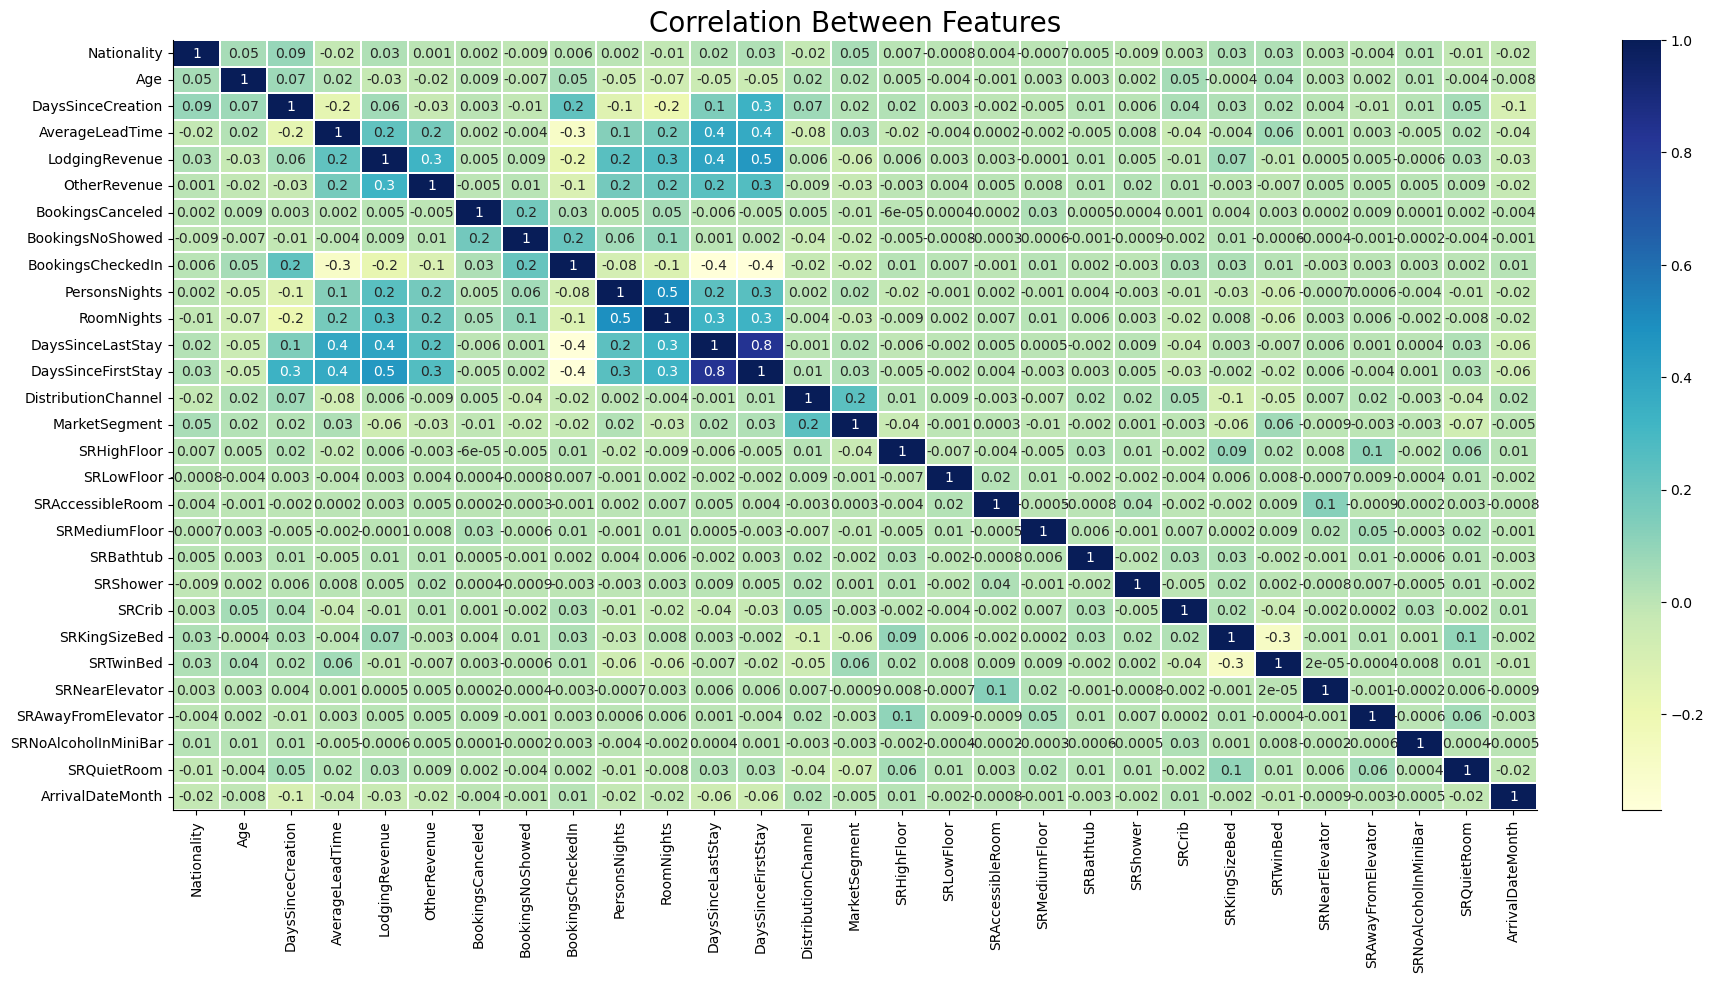

In [22]:
# Correlation with all variables with actual coefficients 
plt.figure(figsize=(22, 10))
df_corr = df.drop('ID', axis=1)
corr = df_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True, fmt='.1g')
plt.title('Correlation Between Features', fontsize=20)
sns.despine();

In [23]:
# Creating a subset dataset with only the requests made by the customers
df1 = df[['ID','SRHighFloor','SRQuietRoom','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar']]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

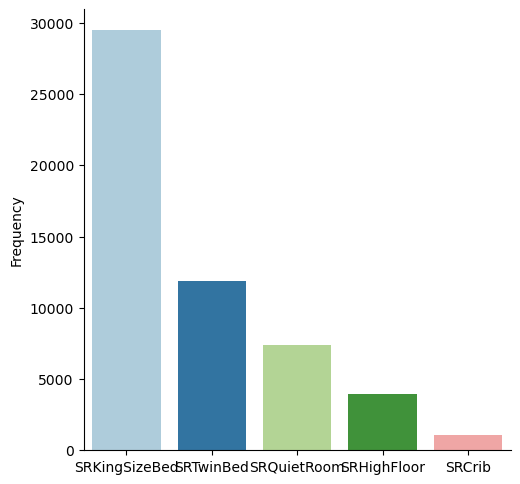

In [24]:
#Request Distribution
df1 = pd.DataFrame(df[['SRHighFloor','SRQuietRoom','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar']].T.sum(axis=1))
df1.columns =['Frequency'] 
type(df1)
df1 = df1.sort_values('Frequency',ascending=False)[:5]

p1 = sns.catplot(data = df1, x= df1.index, y = df1['Frequency'],kind='bar',ci=None,palette='Paired')
plt.title('Center Title')
plt.title('Top 5 Requests From Customers', fontsize = 17)

ax = p1.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')
    
plt.xticks(rotation = 45)

In [25]:
# Checking our sub dataset 
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.402401,453.640902,66.204068,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.162222,313.390291,87.755912,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,45.402401,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,56.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,96.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Frequency of Nationalities')

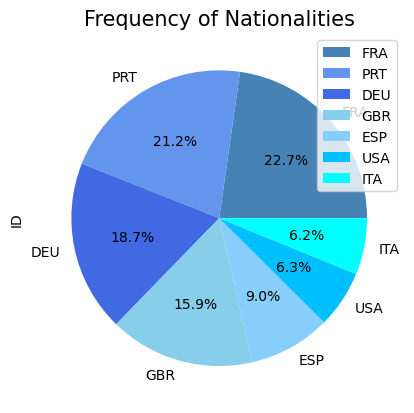

In [26]:
# Market Analysis of Customers by Nationality
dfn = df.groupby("Nationality")["ID"].count()
dfn = pd.DataFrame(dfn)
dfn =dfn.sort_values('ID',ascending=False)[:7]
dfn.plot.pie(autopct="%.1f%%",subplots=True, colors = ["steelblue", "cornflowerblue", "royalblue", "skyblue", "lightskyblue", "deepskyblue", "aqua"])
plt.title("Frequency of Nationalities", fontsize = 15)

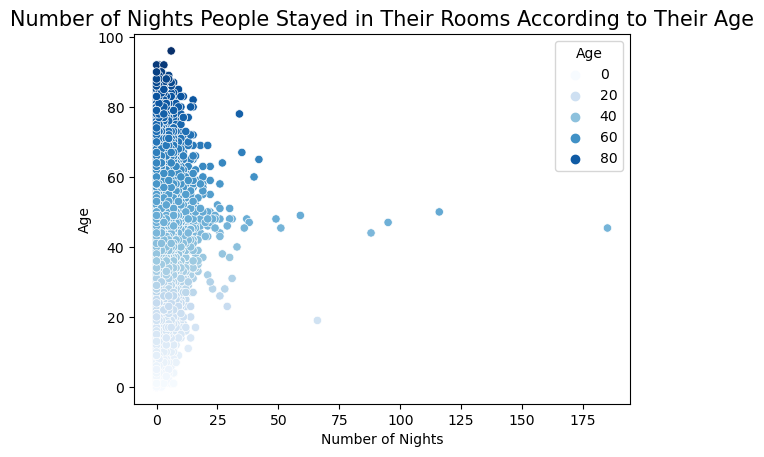

In [27]:
# Number of Nights People Stayed in Their Rooms According to Their Age
sns.scatterplot(x="RoomNights", y="Age",
              hue="Age",
              data=df, palette = "Blues")
plt.title('Number of Nights People Stayed in Their Rooms According to Their Age', fontsize = 15)
plt.xlabel('Number of Nights')
plt.ylabel('Age')
plt.show()

In [ ]:
data = df

In [ ]:
country_wise_data=data[data['BookingsCanceled']==0]['Nationality'].value_counts().reset_index()
country_wise_data.columns=['Nationality','BookingsCheckedIn']
country_wise_data

In [ ]:
!pip install plotly
!pip install chart_studio

In [ ]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [ ]:
import plotly.express as px

In [ ]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['Nationality'],
             color=country_wise_data['BookingsCheckedIn'],
              hover_name=country_wise_data['Nationality'],
              title='home country of guests'
             )

Conclusion: mostly people from those countries are staying at the hotel

In [ ]:
data2=data[data['BookingsCanceled']==0]

In [ ]:
data2.columns

In [ ]:
# seaborn boxplot:

plt.figure(figsize=(12,8))
sns.boxplot(x='MarketSegment',y='LodgingRevenue' ,hue='BookingsCheckedIn',data=data2)

plt.title('Revenue according to market type')
plt.xlabel('MarketSegment')
plt.ylabel('LodgingRevenue')

In [ ]:
data['BookingsCheckedIn'].unique()

In [ ]:
data_r=data[(data['BookingsCheckedIn']== True) & (data['BookingsCanceled']==0)]

In [ ]:
data_r.head(3)

In [ ]:
r_resort=data_r['ArrivalDateMonth'].value_counts().reset_index()
r_resort.columns=['month','nr_of_guests']
r_resort

In [ ]:
!pip install sort_dataframeby_monthorweek

In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
data=sd.Sort_Dataframeby_Month(data,'ArrivalDateMonth')

In [ ]:
sns.barplot(x='ArrivalDateMonth',y='BookingsCheckedIn',data=data ,hue='BookingsCanceled')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='ArrivalDateMonth',y='BookingsCheckedIn',data=data ,hue='BookingsCanceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

Sampling data (computational difficulty)

In [28]:
df_subset = df.sample(frac =.20, replace=False, random_state=820) 
df_subset.shape

(16718, 30)

In [87]:
# Saving the subset file to be used for analysis locally
df_subset.to_excel('df_subset.xlsx', index = False)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (482823519.py, line 2)

# Association Rules

We applied the association rules to explore and understand the hotel's preference of customers. We focused on two things in association rules: 1) understand which customers are more likely to return to the same hotel for repeated stays, therefore holds substantial value to the hotel; 2) understand the stay length patterns of customers,and provide possible suggestions to increase hotel profits.

Create subset dataframe(a category) for association rules- since our original dataset is mostly numeric value-based, we selected several attributes (age, average daily price, nationality, repeated bookings, length of stay, distribution channels), renamed the numeric value in label groups, and converted them into category type

In [36]:
# Association Rules

# sub_data_frame for Association Rules with selected columns
df_Association_Rules = df_subset[['ID','RoomNights','Age','MarketSegment','Nationality']]

df_Association_Rules['Repeated Bookings'] = df_subset['PersonsNights']/df_subset['RoomNights']
#drop nan for Repeated Stays

C:\Users\bruna\AppData\Local\Temp\ipykernel_22720\315623735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Association_Rules['Repeated Bookings'] = df_subset['PersonsNights']/df_subset['RoomNights']


In [37]:
# Because there are 0 recorded in PersonsNight & RoomNights
df_subset['PersonsNights'].unique()
df_subset['RoomNights'].unique()

# Focus on current customers
# drop nan for Repeated Stays

df_Association_Rules = df_Association_Rules[df_Association_Rules['Repeated Bookings'].notnull()]

In [38]:
# Reset columns type
df_Association_Rules['Repeated Bookings'] = df_Association_Rules['Repeated Bookings'].astype('int')

In [39]:
# Change Repeated Stays type
df_Association_Rules['Repeated Bookings'].astype('category')

# Create Repeated Stays Group
bins = [0,1,2,3,10]
labels = ['No Booking Yet','Book 1 Time','Book 2 Times','Book 3 Times and above']
df_Association_Rules['Repeated Bookings'] = pd.cut(df_Association_Rules['Repeated Bookings'], bins=bins, labels=labels, right=False)

In [40]:
df_Association_Rules['Average Daily Price'] = df_subset['LodgingRevenue']/df_subset['PersonsNights']
# drop na for Average Daily Price
df_Association_Rules = df_Association_Rules[df_Association_Rules['Average Daily Price'].notnull()]

In [41]:
# Reset Age column type from float to int
df_Association_Rules['Age'] = df_Association_Rules['Age'].astype('int')

In [42]:
# Create 6 Nation Labels (Top 5 Nations and all Others)

top_5 = df_Association_Rules.loc[(df_Association_Rules['Nationality'] == 'PRT') | (df_Association_Rules['Nationality'] =='FRA')| (df_Association_Rules['Nationality'] =='DEU')| (df_Association_Rules['Nationality'] =='GBR')| (df_Association_Rules['Nationality'] =='ESP')]

other = df_Association_Rules.loc[(df_Association_Rules['Nationality'] != 'PRT') | (df_Association_Rules['Nationality'] !='FRA')| (df_Association_Rules['Nationality'] !='DEU')| (df_Association_Rules['Nationality'] !='GBR')| (df_Association_Rules['Nationality'] !='ESP')]
other['Nationality'] = 'Others Countries'

frames = [top_5,other]
df_Association_Rules = pd.concat(frames)

In [43]:
# Relabel Market Segment
# Create 4 labels: Travel Agent, Groups, Corporate, and Others
labs3 = df_Association_Rules.loc[(df_Association_Rules['MarketSegment'] == 'Travel Agent/Operator') |(df_Association_Rules['MarketSegment'] == 'Groups') |(df_Association_Rules['MarketSegment'] == 'Corporate')]
labs1 = df_Association_Rules.loc[(df_Association_Rules['MarketSegment'] == 'Other') |(df_Association_Rules['MarketSegment'] == 'Direct') |(df_Association_Rules['MarketSegment'] == 'Corporate')]
labs1['MarketSegment'] = 'Other'

frames = [labs3,labs1]
df_Association_Rules = pd.concat(frames)

C:\Users\bruna\AppData\Local\Temp\ipykernel_22720\3832450572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labs1['MarketSegment'] = 'Other'


In [44]:
# Create Age groups
bins= [0,18,40,60,150]
labels = ['Kid <17','Adult 18-39','Adult 40-59','Senior 60+']
df_Association_Rules['Age Group'] = pd.cut(df_Association_Rules['Age'], bins=bins, labels=labels, right=False)

In [45]:
# Reset Age column type from float to int
df_Association_Rules['Average Daily Price'] = df_Association_Rules['Average Daily Price'].astype('int')

# Create Average Daily Price Group
# low : price < 100
# medium: price 100-250
# high: price > 250
bins= [0,100,250,2000]
labels = ['Low','Medium','High']
df_Association_Rules['Avg Daily Price'] = pd.cut(df_Association_Rules['Average Daily Price'], bins=bins, labels=labels, right=False)

In [46]:
# Create RoomNights Group
df_Association_Rules['RoomNights'].unique()

bins = [0,2,4,15,200]
labels = ['Single Day', 'Weekend Trip','Holiday', 'Extended']
df_Association_Rules['Length of Stay'] = pd.cut(df_Association_Rules['RoomNights'], bins=bins, labels=labels, right=False)

In [47]:
# Rename Market Segment Column
df_Association_Rules['Market Segment'] = df_Association_Rules['MarketSegment']

In [48]:
# Create df with only category columns
df_AR = df_Association_Rules[['Age Group','Market Segment','Avg Daily Price','Nationality', 'Repeated Bookings', 'Length of Stay']]

In [49]:
#df_AR.info()
sh = df_AR.shape
print("There are {} rows and {} columns.".format(sh[0], sh[1]))

There are 20653 rows and 6 columns.


df_AR is the data frame we will usr in Association Rules application

In [50]:
from mlxtend.preprocessing import TransactionEncoder

# form df_AR into dataframe lists
dataset = df_AR.values.tolist()

dataset

te = TransactionEncoder()

te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Adult 18-39,Adult 40-59,Book 1 Time,Book 2 Times,Book 3 Times and above,Corporate,DEU,ESP,Extended,FRA,...,Low,Medium,No Booking Yet,Other,Others Countries,PRT,Senior 60+,Single Day,Travel Agent/Operator,Weekend Trip
0,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
1,False,True,True,False,False,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2,True,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,True,False,True,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
4,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20648,False,True,False,True,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True
20649,False,True,False,True,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True
20650,False,True,True,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,True
20651,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,True,False,True,True,False,False


## Loyalty check- Apriori Algorithm

Check by age, nationality, lenght of stay

Apriori algorithm is used in loyalty check to gain insight into the structured relationships between different items involved. Apriori algorithm is a classic example to implement association rule mining- a technique to identify the frequent patterns and the correlation between the items present in a dataset.

Some cells down, we can see that there's a group of cells related to "co-relation". It's just another example of what's going to be shown right now.

In [54]:
# Loyal Check by Age 
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
# Loyal Check by Age 
dfl_a = df[['Adult 18-39','Adult 40-59','Book 1 Time','Kid <17','Senior 60+','Book 2 Times','Book 3 Times and above']]
frequent_itemsets = apriori(dfl_a, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rulesl_a = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesl_a.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(Book 3 Times and above),(Kid <17),0.128020,0.013848,0.005762,0.045008,3.250144,0.003989,1.032628
16,(Kid <17),(Book 3 Times and above),0.013848,0.128020,0.005762,0.416084,3.250144,0.003989,1.493331
11,(Book 3 Times and above),(Adult 40-59),0.128020,0.505399,0.084637,0.661120,1.308115,0.019935,1.459515
10,(Adult 40-59),(Book 3 Times and above),0.505399,0.128020,0.084637,0.167465,1.308115,0.019935,1.047379
19,(Book 2 Times),(Senior 60+),0.630417,0.198373,0.156103,0.247619,1.248249,0.031045,1.065453
18,(Senior 60+),(Book 2 Times),0.198373,0.630417,0.156103,0.786917,1.248249,0.031045,1.734458
6,(Book 1 Time),(Adult 40-59),0.241369,0.505399,0.143272,0.593581,1.174480,0.021284,1.216973
7,(Adult 40-59),(Book 1 Time),0.505399,0.241369,0.143272,0.283483,1.174480,0.021284,1.058776
2,(Adult 18-39),(Book 2 Times),0.282380,0.630417,0.189997,0.672840,1.067293,0.011979,1.129669
3,(Book 2 Times),(Adult 18-39),0.630417,0.282380,0.189997,0.301382,1.067293,0.011979,1.027200


In the first part of association rules mining, we specified the consequence control in repeated bookings; for the antecedents control, we selected Age, Nationality, and Length of Stay. We first applied one antecedent to one consequent methodology in finding the association between the consequence and each antecedent (e.g. {Age Group = Adults 40-59} => {Repeated Bookings = Book 2 Times}). Apriori generated all the possible rules for customer loyalty, yet we filtered the table by only looking at the rules with lift value >1

Text(0.5, 1.0, 'Lift(Age --> Customer Loyalty)')

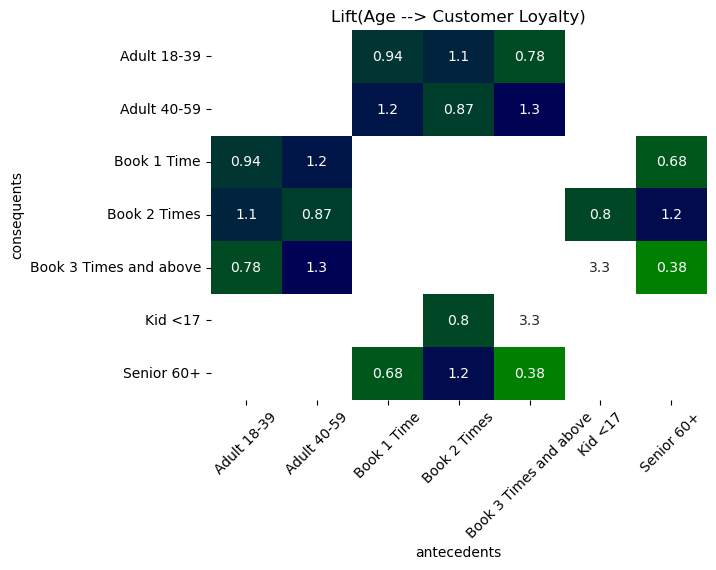

In [55]:
# Heat Map
# Convert antecedents and consequents into strings
rulesl_a['antecedents'] = rulesl_a['antecedents'].apply(lambda a: ','.join(list(a)))
rulesl_a['consequents'] = rulesl_a['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rulesl_a.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Age --> Customer Loyalty)")

In [53]:
# Loyal Check by Nation 
dfl_n = df[['DEU','ESP','FRA','GBR','Book 1 Time','Book 2 Times','Book 3 Times and above','Others Countries','PRT']]
frequent_itemsets = apriori(dfl_n, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rulesl_n = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesl_n.sort_values(by='lift',ascending=False)

NameError: name 'apriori' is not defined

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
rulesl_n['antecedents'] = rulesl_n['antecedents'].apply(lambda a: ','.join(list(a)))
rulesl_n['consequents'] = rulesl_n['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rulesl_n.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Nationality --> Customer Loyalty)")

In [ ]:
# Loyal Check by Length of Stay
dfl_l = df[['Book 1 Time','Book 2 Times','Book 3 Times and above','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dfl_l, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rulesl_l = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesl_l.sort_values(by='lift',ascending=False)


In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
rulesl_l['antecedents'] = rulesl_l['antecedents'].apply(lambda a: ','.join(list(a)))
rulesl_l['consequents'] = rulesl_l['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rulesl_l.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Length of Stay --> Customer Loyalty)")

So we are sure that the two occurrences are dependent on one another, and the rules are potentially useful

#### Length of stay and Influencing factors
Age group, MarketSegment, Average Daily Price, Nationality, etc

Below is the association rules table (partial) generated (for consequence = {Book 3 Times and above} and {Book 2 Times} separately)

In [ ]:
# Loyalty Check by 3 Antecedents
# Check Custoemr by Booking 2 Times in AR
#dfl = df[['Adult 18-39','Adult 40-59','Book 1 Time'  ,'Book 2 Times','Book 3 Times and above','DEU','ESP','FRA','GBR','Kid and Teen 10-17','No Booking Yet','Others Countries','PRT','Senior 60+','Extended','Holiday','Single Day', 'Weekend Trip']]
# Generate frequent itemsets
dfl_3 = df[['Adult 18-39','Adult 40-59','Book 1 Time' ,'Book 2 Times','Book 3 Times and above','DEU','ESP','FRA','GBR','Kid <17','Others Countries','PRT','Senior 60+','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dfl_3, min_support=0.05, use_colnames=True)
#frequent_itemsets
from mlxtend.frequent_patterns import association_rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.00)
# Check Custoemr by Booking 2 Times
rules.loc[rules.consequents == {'Book 2 Times'},:].sort_values(by='lift',ascending=False)

In [ ]:
# Loyalty Check by 3 Antecedents
# Check Custoemr by Booking 3 Times and above in AR
# Generate frequent itemsets
dfl_3 = df[['Adult 18-39','Adult 40-59','Book 1 Time' ,'Book 2 Times','Book 3 Times and above','DEU','ESP','FRA','GBR','Kid <17','Others Countries','PRT','Senior 60+','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dfl_3, min_support=0.03, use_colnames=True)
#frequent_itemsets
from mlxtend.frequent_patterns import association_rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.00)
# Check Custoemr by Booking 2 Times
rules.loc[rules.consequents == {'Book 3 Times and above'},:].sort_values(by='lift',ascending=False)

In [ ]:
# Length of Stay by Age
dflen_a = df[['Extended','Holiday','Single Day', 'Weekend Trip','Adult 18-39','Adult 40-59','Kid <17','Senior 60+']]
frequent_itemsets = apriori(dflen_a, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_a = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_a.sort_values(by='lift',ascending=False)

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_a ['antecedents'] = ruleslen_a ['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_a ['consequents'] = ruleslen_a ['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_a .pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Age --> Length of Stay)")

We conclude that customers aged from 40-59 and 60 above are likely to rebook the hotel 2 and more than 2 times. What’s more, customers in these two age groups are likely to stay longer as they are more likely to book for holiday or weekend trips.

In [ ]:
# Length of Stay by Nationality
dflen_n = df[['DEU','ESP','FRA','GBR','Others Countries','PRT','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dflen_n, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_n = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_n.sort_values(by='lift',ascending=False)

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_n['antecedents'] = ruleslen_n['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_n['consequents'] = ruleslen_n['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_n.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Nationality --> Length of Stay)")

In [ ]:
# Length of Stay by Avg Daily Price
dflen_p = df[['Extended','Holiday','Single Day', 'Weekend Trip','Low','Medium','High']]
frequent_itemsets = apriori(dflen_p, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_p = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_p.sort_values(by='lift',ascending=False)


In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_p['antecedents'] = ruleslen_p['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_p['consequents'] = ruleslen_p['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_p.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Avg Daily Price --> Length of Stay)")

In [ ]:
# Length of Stay by Market Segment
dflen_m = df[['Extended','Holiday','Single Day', 'Weekend Trip','Groups', 'Corporate', 'Travel Agent/Operator', 'Other']]
frequent_itemsets = apriori(dflen_m, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_m = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_m.sort_values(by='lift',ascending=False)


In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_m['antecedents'] = ruleslen_m['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_m['consequents'] = ruleslen_m['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_m.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Market Segment --> Length of Stay)")

Conclusions: 1) seniors are most likely to book the hotel for weekend trips and holidays; adults aged 18-59 tend to book for single trips more. 2)As for nationality, German and French people are likely to book for holiday purposes; Portugal and Spanish people visit Single Day stay, and British is likely for weekend trips. 3) As for the average daily price, the single night booking has a higher average price, whereas the holiday has, on average, the lowest daily price. 4) In terms of the different
distribution channels, most single-day bookings are ordered via corporate or direct channels. In contrast, people who plan to stay on holiday or weekend tend to book from Travel Agents.


In [78]:
!pip install sorted-months-weekdays

## Dependency package needs to be installed
!pip install sort_dataframeby_monthorweek

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=4e65ff11794d750a63ea047acb583aeac9d7f3b8db26264c34c11e0c29425ed9
  Stored in directory: c:\users\bruna\appdata\local\pip\cache\wheels\2a\70\02\2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=90bd3a5c50fb80ae3bf46b69758cdd07f0e694c23b05d5147ffb3adb517c033c
  Stored in directory: c:\users\bruna\appdata\local\pip\cache\wheels\94\66\fa\f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort_dataframeby_monthorweek


In [79]:
import sort_dataframeby_monthorweek as sd

In [89]:
data=sd.Sort_Dataframeby_Month(data,'ArrivalDateMonth')

KeyError: 'ArrivalDateMonth'

In [86]:
sns.barplot(x='ArrivalDateMonth',y='AverageLeadTime',data=data ,hue='BookingsCanceled')
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret input 'arrival_date_month'

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='ArrivalDateMonth',y='AverageLeadTime',data=data ,hue='BookingsCanceled)
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

By analysing both cases, we suggest the hotel consider providing coupons/rewards to customers aged from 40 above when they book for holiday or weekend trips because these are the potential loyal customers who are highly likely to rebook several times. With the coupon options that lower the average price per night, more previous customers will likely book the hotel again. On the other hand, the hotel could consider raising the average price per stay for customers who book for only one night's stay.

# Scaling
Dropping useless columns and non-numeric ones

In [ ]:
#dropping non numeric
df_numeric = df_subset.drop(columns=["Nationality", "DistributionChannel", "MarketSegment", "ID"])
df_numeric.head(2)

In [ ]:
#scaling data
sc=StandardScaler()
scaled_numeric = sc.fit_transform(df_numeric)
#put scaled values back into dataframe
df_scaled = pd.DataFrame(scaled_numeric, index=df_numeric.index, columns=df_numeric.columns)
df_scaled.head(2)

# Clustering 

In [ ]:
# Clustering

# Loop to have all the methods at once with Euclidean distance (default) 
METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))


# loop and build our plot
for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(df_scaled.values, method=m),
             labels = df_scaled.index,
             leaf_rotation=90, 
             leaf_font_size=2)
  
plt.show()

Checking best distance between Euclidean and Cosine

In [ ]:
diste = pdist(df_scaled.values)
distcos = pdist(df_scaled.values, metric="cosine")
hclust_e = linkage(diste)
hclust_c = linkage(distcos)
LINKS = [hclust_e, hclust_c]
TITLE = ['Euclidean', 'Cosine']
plt.figure(figsize=(15, 5))
# loop and build our plot
for i, m in enumerate(LINKS):
  plt.subplot(1, 2, i+1)
  plt.title(TITLE[i])
  dendrogram(m,
             leaf_rotation=90,
             orientation="left")
plt.show()

In [ ]:
# fit the complete hierarchical clustering model with Cosine distance
df_hclust = linkage(df_scaled, method='complete', metric = 'cosine')

# plot the dendrogram
plt.figure(figsize=(15,5))
dendrogram(df_hclust,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=2)
plt.title("Clusters with complete method and cosine distance")
plt.show()

In [ ]:
# fit the average hierarchical clustering model with Cosine distance
df_hclust = linkage(df_scaled, method='average', metric = 'cosine')

# plot the dendrogram
plt.figure(figsize=(15,5))
dendrogram(df_hclust,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=2)
plt.title("Clusters with average method and cosine distance")
plt.show()

In [ ]:
# fit the single hierarchical clutering model with Cosine distance
df_hclust = linkage(df_scaled, method='single', metric = 'cosine')

# plot the dendrogram
plt.figure(figsize=(15,5))
dendrogram(df_hclust,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=2)
plt.title("Clusters with single method and cosine distance")
plt.show()

The best model on clustering was the complete method with cosine distance (22 clusters). However, we concluded that this model was not the best for our study, so we did not go further into the analysis.

# KMeans

In [ ]:
# K-MEANS

kValues = range(2,25)
inertia = []
sil = []

for k in kValues:
  km = KMeans(k)
  km.fit(df_scaled)
  clusterLabels = km.predict(df_scaled)
  inertia.append(km.inertia_)
  sil.append(silhouette_score(df_scaled,clusterLabels))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Inertia")
sns.lineplot(kValues, inertia)


plt.subplot(1,2,2)
plt.title("Silo Score")
sns.lineplot(kValues, sil)

In [ ]:
#13 looks good
df_scaled_Kmeans = df_scaled.copy()
kcluster = KMeans(13)
kcluster.fit(df_scaled_Kmeans)
kClusterLabels = kcluster.predict(df_scaled_Kmeans)

In [ ]:
df_KMeansProfile = df_numeric.copy()
df_KMeansProfile['Cluster_Assignment'] = kClusterLabels
df_KMeansProfile.head(2)

In [ ]:
#groupings
df_KMeansProfile.Cluster_Assignment.value_counts(sort=False)

In [ ]:
#trying to inspect clusters
df_KMeansProfile.groupby('Cluster_Assignment').mean().T

#### Clustering

In [ ]:
#observing different clusters and trying to find a balance between inertia and silohouette score
kValues = range(2,25)
inertia = []
sil = []

for k in kValues:
  km = KMeans(k)
  km.fit(dfPC)
  clusterLabels = km.predict(dfPC)
  inertia.append(km.inertia_)
  sil.append(silhouette_score(dfPC,clusterLabels))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Inertia")
sns.lineplot(kValues, inertia)


plt.subplot(1,2,2)
plt.title("Silo Score")
sns.lineplot(kValues, sil)

In [ ]:
#KMeans clutering
#10 seems ok to minimize intertia and maximize silo score
kcluster = KMeans(10)
kcluster.fit(dfPC)
kClusterLabels = kcluster.predict(dfPC)

In [ ]:
skplt.metrics.plot_silhouette(dfPC, kcluster.predict(dfPC), figsize=(7,7))

In [ ]:
#put back on dataframe

dfPC['Cluster_Assignment'] = kClusterLabels
dfPC.head()

In [ ]:
dfPC.Cluster_Assignment.value_counts(sort=False)

In [ ]:
PCA_KMeans_Profile = pd.concat(([df_numeric,dfPC]), axis=1)
PCA_KMeans_Profile.head()
PCA_KMeans_Profile.groupby('Cluster_Assignment').mean().T.head(25)

First, a KMeans baseline was established. This baseline was just executing the KMeans algorithm without any dimensionality reduction techniques. The number of clusters was selected based on minimizing inertia and maximizing silhouette score as well as the business problem of hotel customer segmentation. 13 clusters were selected as the optimal, however the clusters turned out to be imbalanced. Six out of 13 clusters have less than 50 observations with three of those six having observations less than 10
observations. From the hotel perspective, it could potentially be difficult for a hotel to formulate their strategy based off of less than 10 customers being in a group as those customers could also be outliers/rare cases.
Next we did the following: apply dimensionality reduction technique, obtain inertia and silhouette plots, select number of clusters, and then run the KMeans algorithm. The first dimensionality reduction technique explored was PCA. Our goal was to try and maintain 95% of the variance in the principal components. Based on the cumulative explained variance graph it seemed that 19 principal components were optimal. However the eigenvalue bar plot that was constructed depicted that around eight components would be optimal. Considering the trade-offs, we decided to take 14 principal components and perform clustering. We ended up with 10 clusters. Similar to the previous example, the clusters are still imbalanced however not as badly as just the KMeans without any dimensionality reduction.

# Co-relation

C:\Users\bruna\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



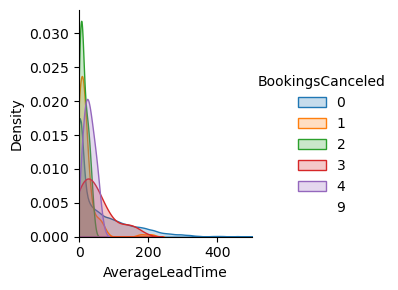

In [82]:
sns.FacetGrid(data,hue='BookingsCanceled',xlim=(0,500)).map(sns.kdeplot,'AverageLeadTime',shade=True).add_legend()

In [83]:
corr = data.corr()

In [84]:
corr

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,1.000000,-0.129488,-0.986869,-0.147857,-0.099815,-0.160622,-0.018451,-0.012719,-0.283568,-0.247839,...,-0.004869,0.009147,0.004226,0.043317,0.027711,0.020030,0.003949,-0.010966,0.011757,0.053777
Age,-0.129488,1.000000,0.126327,0.248444,0.051894,0.113674,0.004366,0.006326,0.129674,0.111082,...,0.007087,-0.018723,0.010708,-0.118644,-0.003239,0.014077,0.012407,0.009598,-0.010559,0.013813
DaysSinceCreation,-0.986869,0.126327,1.000000,0.135879,0.090546,0.154925,0.018392,0.012798,0.276638,0.239287,...,0.005288,-0.011744,-0.005485,-0.040625,-0.030435,-0.023928,-0.004422,0.011260,-0.010916,-0.055553
AverageLeadTime,-0.147857,0.248444,0.135879,1.000000,0.215821,0.239673,-0.015344,-0.011770,0.241825,0.350833,...,-0.000272,-0.005922,0.008276,-0.040282,-0.014750,0.080215,0.000077,0.000021,-0.006245,0.008468
LodgingRevenue,-0.099815,0.051894,0.090546,0.215821,1.000000,0.526299,0.070544,0.062202,0.423002,0.652267,...,0.005816,0.005199,0.011856,-0.017003,0.012839,0.009877,0.004334,0.012205,-0.000911,0.052265
OtherRevenue,-0.160622,0.113674,0.154925,0.239673,0.526299,1.000000,0.043600,0.033985,0.302887,0.530646,...,0.007211,0.009147,0.011412,0.001154,0.012729,0.014834,0.000542,0.011709,0.004919,0.016113
BookingsCanceled,-0.018451,0.004366,0.018392,-0.015344,0.070544,0.043600,1.000000,0.314696,0.462677,0.086623,...,0.023367,-0.001618,-0.001253,-0.003505,0.017773,-0.007221,-0.000554,0.004267,-0.000331,-0.006271
BookingsNoShowed,-0.012719,0.006326,0.012798,-0.011770,0.062202,0.033985,0.314696,1.000000,0.285094,0.066273,...,-0.000634,-0.001147,-0.000888,-0.002484,0.011277,-0.000642,-0.000393,-0.001273,-0.000235,-0.003829
BookingsCheckedIn,-0.283568,0.129674,0.276638,0.241825,0.423002,0.302887,0.462677,0.285094,1.000000,0.488594,...,0.011055,-0.004879,-0.000262,-0.037493,0.009353,-0.023403,0.000705,0.009361,-0.004632,-0.011318
PersonsNights,-0.247839,0.111082,0.239287,0.350833,0.652267,0.530646,0.086623,0.066273,0.488594,1.000000,...,0.005906,0.016639,0.013827,-0.012161,0.041747,0.005773,0.001406,0.014527,-0.002033,0.031511


In [85]:
corr['BookingsCanceled'].sort_values(ascending=False)

BookingsCanceled        1.000000
BookingsCheckedIn       0.462677
BookingsNoShowed        0.314696
RoomNights              0.197127
PersonsNights           0.086623
LodgingRevenue          0.070544
OtherRevenue            0.043600
SRMediumFloor           0.023367
DaysSinceCreation       0.018392
SRKingSizeBed           0.017773
DaysSinceFirstStay      0.016118
Age                     0.004366
SRAwayFromElevator      0.004267
SRNoAlcoholInMiniBar   -0.000331
SRAccessibleRoom       -0.000480
SRNearElevator         -0.000554
SRLowFloor             -0.001138
SRShower               -0.001253
SRBathtub              -0.001618
SRCrib                 -0.003505
SRHighFloor            -0.005076
SRQuietRoom            -0.006271
SRTwinBed              -0.007221
AverageLeadTime        -0.015344
ID                     -0.018451
DaysSinceLastStay      -0.025968
Name: BookingsCanceled, dtype: float64

In [86]:
corr['BookingsCanceled'].sort_values(ascending=False).index

Index(['BookingsCanceled', 'BookingsCheckedIn', 'BookingsNoShowed',
       'RoomNights', 'PersonsNights', 'LodgingRevenue', 'OtherRevenue',
       'SRMediumFloor', 'DaysSinceCreation', 'SRKingSizeBed',
       'DaysSinceFirstStay', 'Age', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRAccessibleRoom', 'SRNearElevator',
       'SRLowFloor', 'SRShower', 'SRBathtub', 'SRCrib', 'SRHighFloor',
       'SRQuietRoom', 'SRTwinBed', 'AverageLeadTime', 'ID',
       'DaysSinceLastStay'],
      dtype='object')

We couldn't decide on what features to drop, so we commented those cells

In [ ]:
#features_to_drop=[]

In [ ]:
#dataframe.drop(features_to_drop,axis=1,inplace=True)

In [ ]:
#dataframe.shape

# Conclusion

Overall findings
● Among the 10 clusters, the average age of overall customers is around 48.
● More than 3 clusters have customers who created their account more than 2 years ago.
● Among the 10 clusters profile, no cluster shows the value 1 in Cancelling/ Not Showed for the reservation.
● With our analysis of lodging revenues and room nights, we realized that the people who spent the least were the people who booked their stay the closest to the actual date.
● People who booked their stay the closest to the actual date were also the most likely to not check in with their reservation afterward.
● The most frequent requests: asking for a king size or a twin size bed, as well as for a quiet room. All the other requests were not used a lot on our sample.


Recommendations
● Since the average customer is middle aged, the hotel should target these people especially (Adults 40-59 are most likely to rebook).
● The hotel has a lot of loyal customers; it is reasonable to suggest the hotel to provide more rewards to attract and maintain these previous customers.
● Since people did not show a pattern of canceling or not showing their reservation, this means that the hotel does not have to adopt a credit card mandatory fill form at the moment of the reservation.
● Adjust the price/night based on association rules, provide a higher daily price for customers booking only for 1 night, but a lower price for customers booking for holiday trips (Could add some coupon for customers booking from Travel Agent/Operator)